In [1]:
import pandas as pd 
from datetime import datetime as dt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from langdetect import detect, DetectorFactory
import re 

In [3]:
data = pd.read_csv('TestData.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

C:\Users\Bmbofwana\AppData\Local\Temp\ipykernel_860\532725813.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('TestData.csv')


,name,goal,sub_category,main_category,launched,deadline
0,The Songs of Adelaide & Abullah,1000,Poetry,Publishing,2015-08-11 12:12:28,2015-10-09 11:36:00
1,Where is Hank?,45000,Narrative Film,Film & Video,2013-01-12 00:20:50,2013-02-26 00:20:50
2,ToshiCapital Rekordz Needs Help to Complete Album,5000,Music,Music,2012-03-17 03:24:11,2012-04-16 04:24:11
3,Community Film Project: The Art of Neighborhoo...,19500,Film & Video,Film & Video,2015-07-04 08:35:03,2015-08-29 01:00:00
4,Monarch Espresso Bar,50000,Restaurants,Food,2016-02-26 13:38:27,2016-04-01 13:38:27


In [4]:
#Dataset Overview
print(data.dtypes, '\n')
print('Data dimensions are: ', data.shape)
data.isnull().sum()
data.dropna(inplace=True)
data.drop(columns = ['deadline'], inplace = True)
data.sample(5)


name             object
goal             object
sub_category     object
main_category    object
launched         object
deadline         object
dtype: object 

Data dimensions are:  (323125, 6)


,name,goal,sub_category,main_category,launched
119494,The Photo Arts Collective presents Paintings o...,750,Photography,Photography,2011-02-14 07:30:28
213602,"Real Food Real Kitchens: Family, Food, Culture...",15000,Food,Food,2013-12-23 03:39:35
262175,"Wunderhaus, a stylish family wellness center.",50000.0,Design,Design,2015-10-01 10:24:29
78043,Gear Hanger,200,Product Design,Design,2015-01-29 23:10:33
276875,Sustain: A Film About Survival,1000.0,Drama,Film & Video,2016-02-03 02:55:55


In [5]:
#Find duplicated data 
dups = data[data.duplicated(['name','main_category'], keep=False)].sort_values('name')
dups[:10]

,name,goal,sub_category,main_category,launched
292659,"""...The Last shall be first..."" LODB Lifestyle...",6500.0,Fashion,Fashion,2013-12-19 21:51:50
292456,"""...The Last shall be first..."" LODB Lifestyle...",6500.0,Fashion,Fashion,2014-01-03 20:39:16
1739,"""A Fresh Start""",3000,Shorts,Film & Video,2011-08-28 21:27:52
275523,"""A Fresh Start""",5000.0,Documentary,Film & Video,2013-01-26 03:51:47
300905,"""City of Mercy"" (Canceled)",20000.0,Film & Video,Film & Video,2015-01-27 19:30:43
127925,"""City of Mercy"" (Canceled)",15000,Television,Film & Video,2014-07-29 13:12:21
107127,"""Cut From the Illest Cloth"" - The Brand New Fu...",14000,Hip-Hop,Music,2014-02-02 16:00:57
69425,"""Cut From the Illest Cloth"" - The Brand New Fu...",9000,Hip-Hop,Music,2014-03-01 19:32:15
207691,"""Pulse""- a new album from ""Blind Focus"" to sup...",4000,Music,Music,2016-11-08 03:01:36
3914,"""Pulse""- a new album from ""Blind Focus"" to sup...",4000,Music,Music,2016-11-17 09:45:59


#Explore Individual Features 


Date Exploration 

In [6]:
#Create features
data['date'] = pd.to_datetime(data['launched'], format="%Y-%m-%d",errors='coerce',origin= 'unix').dt.normalize()
data['month'] = data['date'].dt.month.astype('Int64')
data['day_of_week'] = data['date'].dt.dayofweek.astype('Int64')
data['qrt_year'] = data['date'].dt.quarter.astype('Int64')
data['year'] = data['date'].dt.year.astype('Int64')
data.sample(5)

,name,goal,sub_category,main_category,launched,date,month,day_of_week,qrt_year,year
161463,PMJ Footwear | Modern Luxury Shoes,10000,Footwear,Fashion,2015-05-01 23:25:56,2015-05-01,5,4,2,2015
50192,Antoine Allain: THE FIRST ALBUM,8000,Music,Music,2012-01-18 00:53:54,2012-01-18,1,2,1,2012
126453,"Bugatti - REVE BLEU - the ""Blue Dream"" will fi...",50000,Technology,Technology,2013-04-07 05:49:00,2013-04-07,4,6,2,2013
292098,SLYKUMU- New Sounds for the Global Village,22500.0,Documentary,Film & Video,2012-03-10 22:11:08,2012-03-10,3,5,1,2012
45827,Photographer Michael Jay goes to Cali (Canceled),1600,Nature,Photography,2015-07-27 22:37:48,2015-07-27,7,0,3,2015


Goal Exploration 

In [7]:
#remove str patterns from goal 
def remove_dates(row):
    regex = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}|\s{1,}\d{2}:\d{2}:\d{2}'
    if isinstance(row, str):
        pattern = re.compile(regex)
        # Check if the row contains a date pattern and replace it with an empty string
        return re.sub(pattern,'' , row)
    return row

#return values contained in goal 
def str_int(row):
    return [i for i in row if isinstance(i,str)]

values_goal = str_int(data['goal'])
print(sorted(values_goal, key=len,reverse=True)[:10])

def types_(row):
    return row.apply(type).unique()

print(types_(data['goal']))


['2015-11-03 00:59:00', '2015-03-27 01:00:00', '2015-03-03 02:04:57', '2015-10-11 00:47:47', '2014-11-05 03:00:57', '2015-04-24 22:07:03', '2015-03-21 21:13:23', '21474836.47', '21474836.47', '21474836.47']
[<class 'str'> <class 'float'>]


Apply transformations 

In [8]:
data['goal'] = data['goal'].apply(remove_dates)
values_goal = str_int(data['goal'])
print(sorted(values_goal, key=len,reverse=True)[:10])
print(types_(data['goal']))

['21474836.47', '21474836.47', '21474836.47', '21474836.47', '7994641.85', '100000000', '100000000', '100000000', '100000000', '100000000']
[<class 'str'> <class 'float'>]


In [9]:
#Convert all values to numeric 
data['amount$'] = data['goal'].replace("", 0)
data['amount$'] = pd.to_numeric(data['amount$'], errors='coerce').fillna(0)
data['amount$'].describe()

count    3.231210e+05
mean     4.715134e+04
std      1.139572e+06
min      0.000000e+00
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: amount$, dtype: float64

In [10]:
#Drop all missing data
data.dropna(inplace=True)

Genre transformations 

In [11]:
###Reduce the number of Main Categories 
data['main_category'].unique()
Categories = {'Arts': ['Crafts','Art','Photography','Comics','Theater'],
              'News': ['Journalism','Publishing'],
              'Movies': ['Film & Video', 'Video'],
              'Music': ['Music'],
              'Food': ['Food'],
              'Design': ['Design','Fashion'],
              'Games': ['Games'],
              'Tech': ['Technology'],
              'Dance': ['Dance']}


##Recode Main category
def find_category(row):
    for category, items in Categories.items():
        if row['main_category'] in items:
            return category
    return 'Unknown Genre'

data['New_category'] = data.apply(find_category,axis=1)
data.sample(5)


,name,goal,sub_category,main_category,launched,date,month,day_of_week,qrt_year,year,amount$,New_category
222896,DiskoPets (Canceled),100000,Video Games,Games,2016-04-25 16:43:05,2016-04-25,4,0,2,2016,100000.0,Games
88722,A Fight To Save Album Project,2000,Rock,Music,2011-05-08 06:23:58,2011-05-08,5,6,2,2011,2000.0,Music
260554,EMBROIDER YOURSELF unique design beanie hats.,1600,Accessories,Fashion,2015-01-21 23:03:57,2015-01-21,1,2,1,2015,1600.0,Design
269948,Pregnancy with Type 1 Diabetes: Your Month-to-...,3000.0,Nonfiction,Publishing,2016-04-23 03:52:35,2016-04-23,4,5,2,2016,3000.0,News
76039,Keepin' it Real Estate: Florida,1200,Webseries,Film & Video,2016-08-29 17:17:54,2016-08-29,8,0,3,2016,1200.0,Movies


In [12]:
#Recode months based on seasons 
seasons = {
           'winter':[1,2,12],
           'spring': [3,4,5],
           'summer': [6,7,8],
           'fall': [9,10,11]
            }

#Recode days to either weekday or weekend 
day_of_week = {
            'weekday': [1,2,3,4,5],
            'weekend': [6,0]
                }

#Recoding functions 
def find_season(row):
    if pd.isna(row['month']):
        return 'Unknown Season'
    for category, items in seasons.items():
        if row['month'] in items:
            return category
    return 'Unknown Season'


def find_day(row):
    if pd.isna(row['month']):
        return 'Unknown Day'
    for category, items in day_of_week.items():
        if row['day_of_week'] in items:
            return category
    return 'Unknown Day'

#Apply recoding
data['season'] = data.apply(find_season,axis=1)
data['day'] = data.apply(find_day,axis=1)
data.sample(5)

,name,goal,sub_category,main_category,launched,date,month,day_of_week,qrt_year,year,amount$,New_category,season,day
176819,Love Neighborhood,6000,Apps,Technology,2015-08-13 16:59:50,2015-08-13,8,3,3,2015,6000.0,Tech,summer,weekday
103490,Lai Lida Cookies LLC,50000,Food,Food,2015-03-24 11:19:21,2015-03-24,3,1,1,2015,50000.0,Food,spring,weekday
115548,The Health Perception Index (HPI),50000,Software,Technology,2014-08-15 23:57:49,2014-08-15,8,4,3,2014,50000.0,Tech,summer,weekday
11621,Prince Pangur Ban the Fluffy the Collected Series,8000,Webcomics,Comics,2015-05-15 16:00:37,2015-05-15,5,4,2,2015,8000.0,Arts,spring,weekday
281732,SPICES & SPANDEX - The Travel Cookbook,16000.0,Food,Food,2014-03-09 07:37:12,2014-03-09,3,6,1,2014,16000.0,Food,spring,weekend


In [14]:
#Reduce Dimensionality of sub_category
mapping = {
  "Literature": ["Poetry", "Fiction", "Nonfiction", "Anthologies", "Young Adult", "Academic", "Children's Books"],
  "Film & Video": ["Narrative Film", "Film & Video", "Documentary", "Shorts",'Animation'],
  "Music": ["Indie Rock", "Pop", "Electronic Music", "Metal", "Hip-Hop", "Jazz", "World Music", "Classical Music", "R&B", "Country & Folk",'Music','Punk','Rock','Sound','Music Videos'],
  "Food & Drink": ["Restaurants", "Food", "Drinks", "Food Trucks", "Cookbooks", "Vegan", "Farmer's Markets", "Small Batch"],
  "Design & Craft": ["Product Design", "Crafts", "Design", "DIY", "DIY Electronics", "Woodworking", "3D Printing", "Interactive Design",'Graphic Design',"Crafts", "Fine Art", "Painting", "Sculpture"],
  "Comics & Graphic Novels": ["Comic Books", "Graphic Novels", "Webcomics"],
  "Books & Publishing": ["Art Books", "Publishing", "Print", "Photobooks", "Zines", "Periodicals"],
  "Visual Arts": ["Illustration", "Photography", "Fine Art", "Painting", "Mixed Media", "Conceptual Art", "Digital Art", "Installations", "Sculpture",'Art'],
  "Performing Arts": ["Theater", "Dance", "Performances", "Plays", "Musical", "Immersive"],
  "Games & Gaming": ["Games", "Tabletop Games", "Video Games", "Mobile Games", "Live Games", "Gaming Hardware"],
  "Fashion & Apparel": ["Fashion", "Ready-to-wear", "Apparel", "Accessories", "Footwear", "Childrenswear", "Wearables"],
  "Technology": ["Hardware", "Gadgets", "Software", "Apps", "Camera Equipment", "Robots",'Technology','Web','Flight'],
  "Media & Broadcasting": ["Radio & Podcasts", "Television", "Webseries", "Audio",'Video','Journalism'],
  "Events & Festivals": ["Festivals", "Events"],
  "Public & Community Art": ["Public Art", "Community Gardens", "Spaces"],
  "Narrative & Drama": ["Drama", "Comedy", "Action", "Thrillers", "Horror", "Science Fiction", "Fantasy"],
  "Jewelry & Accessories": ["Jewelry"],
  "Home & Living": ["Candles",'Family','People'],
  "Spaces & Architecture": ["Architecture", "Places"],
  "Nature & Exploration": ["Nature", "Space Exploration", "Farms"],
  "Faith & Spirituality": ["Faith"],
  "Experimental & Avant-Garde": ["Experimental"],
  "Photography & Visual Storytelling": ["Photography", "Photobooks"],
  "Performance Art": ["Performance Art"],
  "Food & Culinary": ["Restaurants", "Food", "Drinks", "Cookbooks", "Food Trucks"],
  "Literary Media": ["Publishing", "Print", "Periodicals", "Children's Books"],
  "Gaming & Interactive Media": ["Video Games", "Tabletop Games", "Live Games", "Gaming Hardware", "Mobile Games",'Playing Cards'],
  "Visual Storytelling": ["Comics", "Graphic Novels", "Webcomics"]
}

#Map subcatgories
def sub_cat(row):
    for k,v in mapping.items():
        if row['sub_category'] in v:
            return k
    return 'Unknown Category'
    
#Apply mapping
data['New_Sub'] = data.apply(sub_cat,axis=1)
data.sample(5)

,name,goal,sub_category,main_category,launched,date,month,day_of_week,qrt_year,year,amount$,New_category,season,day,New_Sub
148753,Karma Dynamic Horror Survival,35000,Video Games,Games,2014-07-19 08:57:56,2014-07-19,7,5,3,2014,35000.0,Games,summer,weekday,Games & Gaming
242964,FSU Film School Writers Showcase 2013!,6500,Performance Art,Art,2013-03-27 17:03:14,2013-03-27,3,2,1,2013,6500.0,Arts,spring,weekday,Performance Art
131314,Average Heroes pilot,7000,Animation,Film & Video,2015-06-16 21:51:45,2015-06-16,6,1,2,2015,7000.0,Movies,summer,weekday,Film & Video
148692,My School Years and Memories,40000,Illustration,Art,2015-03-15 01:50:04,2015-03-15,3,6,1,2015,40000.0,Arts,spring,weekend,Visual Arts
135633,Inspiring Imagination with AnnoyingLessons,8000,Publishing,Publishing,2016-12-06 02:46:46,2016-12-06,12,1,4,2016,8000.0,News,winter,weekday,Books & Publishing


In [15]:
#Verify all data is coded correctly 
print(data['New_category'].unique(),'\n')
print(data['New_Sub'].unique(), '\n')
print(data['season'].unique(), '\n')
print(data['day'].unique())

['News' 'Movies' 'Music' 'Food' 'Design' 'Arts' 'Games' 'Tech' 'Dance'] 

['Literature' 'Film & Video' 'Music' 'Food & Drink' 'Design & Craft'
 'Games & Gaming' 'Comics & Graphic Novels' 'Books & Publishing'
 'Fashion & Apparel' 'Performing Arts' 'Visual Storytelling'
 'Media & Broadcasting' 'Public & Community Art' 'Visual Arts'
 'Home & Living' 'Technology' 'Unknown Category' 'Events & Festivals'
 'Narrative & Drama' 'Spaces & Architecture' 'Gaming & Interactive Media'
 'Performance Art' 'Nature & Exploration' 'Experimental & Avant-Garde'
 'Faith & Spirituality' 'Jewelry & Accessories'] 

['summer' 'winter' 'spring' 'fall'] 

['weekday' 'weekend']


Name Transformations


In [17]:
#def detect_language_with_langdetect(row): 
 #   from langdetect import detect_langs
  #    for item in langs: 
            #return item.lang, item.prob 
   # except: return "err", 0.0 

#data['language'] = data['name'].apply(detect_language_with_langdetect)
#data.sample(6)

In [18]:
###View Sub category data points & drop data points having counts < 50
subs = data.groupby('sub_category').size()
counts = data['sub_category'].value_counts()
valid_subcategories = counts[counts >= 250].index
data = data[data['sub_category'].isin(valid_subcategories)]
data.sample(5)

,name,goal,sub_category,main_category,launched,date,month,day_of_week,qrt_year,year,amount$,New_category,season,day,New_Sub
164708,Knitwears in Pure Cashmere,288000,Apparel,Fashion,2016-11-30 05:55:00,2016-11-30,11,2,4,2016,288000.0,Design,fall,weekday,Fashion & Apparel
192745,Chris Seaman Illustration Portfolio Book,1500,Illustration,Art,2012-03-20 20:48:02,2012-03-20,3,1,1,2012,1500.0,Arts,spring,weekday,Visual Arts
165832,I.C.U. - The Interactive Horror Game Show,50000,Video Games,Games,2016-09-27 16:43:05,2016-09-27,9,1,3,2016,50000.0,Games,fall,weekday,Games & Gaming
304894,The Galilean Aramaic Lord's Prayer Bracelet Pr...,1500.0,Fashion,Fashion,2014-02-13 21:27:10,2014-02-13,2,3,1,2014,1500.0,Design,winter,weekday,Fashion & Apparel
122697,TattooBro.com (Canceled),1000,Art,Art,2014-11-24 23:10:33,2014-11-24,11,0,4,2014,1000.0,Arts,fall,weekend,Visual Arts


In [20]:
#Drop duplicated data
print(f'Current Data Dimension is: {data.shape}')
data_clean = data[~data.duplicated(subset=['name','main_category'])]
print(f'The New data dimensions is: {data_clean.shape}')
data_clean.sample(5)

Current Data Dimension is: (317875, 15)
The New data dimensions is: (316807, 15)


,name,goal,sub_category,main_category,launched,date,month,day_of_week,qrt_year,year,amount$,New_category,season,day,New_Sub
208284,Iran at the World Cup,3000,Journalism,Journalism,2014-06-11 05:57:27,2014-06-11,6,2,2,2014,3000.0,News,summer,weekday,Media & Broadcasting
175282,Wedding and Event Photographer,400,People,Photography,2015-01-27 04:59:54,2015-01-27,1,1,1,2015,400.0,Arts,winter,weekday,Home & Living
282549,Stott & Scott The Floppy'wester festival hat -...,10000.0,Accessories,Fashion,2015-03-15 13:37:20,2015-03-15,3,6,1,2015,10000.0,Design,spring,weekend,Fashion & Apparel
305062,"Mondegreen - Studio Demo, and Startup",3000.0,Indie Rock,Music,2013-07-10 23:41:21,2013-07-10,7,2,3,2013,3000.0,Music,summer,weekday,Music
47206,Pope's Natural Jerky,50000,Small Batch,Food,2015-11-03 21:50:40,2015-11-03,11,1,4,2015,50000.0,Food,fall,weekday,Food & Drink


In [21]:
#Check for any uncategorized labels
x = data_clean[data_clean['New_Sub'] == 'Unknown Category']
print(x.groupby('sub_category').size())

Series([], dtype: int64)


In [24]:
#Data to be used 
data_cleaned = data_clean[['name','amount$','day','season','year','New_Sub','New_category']]
print('Cleaned data shape is: ', data_cleaned.shape)
print('Original data shape is: ', data.shape)

Cleaned data shape is:  (316807, 7)
Original data shape is:  (317875, 15)


In [25]:
data_cleaned.info
data_cleaned['transform_goal'] = data_clean['amount$'].copy().apply(lambda x: np.log(x) if x > 0 else x)
data_cleaned.sample(5)


C:\Users\Bmbofwana\AppData\Local\Temp\ipykernel_860\684216280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['transform_goal'] = data_clean['amount$'].copy().apply(lambda x: np.log(x) if x > 0 else x)


,name,amount$,day,season,year,New_Sub,New_category,transform_goal
13225,"Chillistop - The healthy, vegan way to enhance...",4000.0,weekday,winter,2016,Food & Drink,Food,8.294050
118324,Beauty and the Beast,8000.0,weekday,spring,2011,Film & Video,Movies,8.987197
184799,Anima Gate of Memories: Extended Campaign,15000.0,weekend,spring,2014,Games & Gaming,Games,9.615805
299459,ZUCCOTTI PARK,10000.0,weekday,summer,2013,Performing Arts,Arts,9.210340
86280,Lichtenberg Saber Blades,1000.0,weekday,fall,2016,Design & Craft,Design,6.907755


In [27]:
##Create data groupings
season_dist = data_cleaned.groupby(['New_category', 'season'])['day'].count().sort_index().unstack()
spend_dist = data_cleaned.groupby(['New_category', 'season'])['transform_goal'].sum().sort_index().unstack().round(1)
spend_dist


season,fall,spring,summer,winter
New_category,,,,
Arts,112588.9,124548.6,131663.9,90982.4
Dance,6321.1,7359.2,6655.9,5428.7
Design,108318.6,91623.3,97550.8,74348.2
Food,47690.1,46553.3,54260.6,39349.3
Games,70454.9,64753.4,65283.1,47422.0
Movies,122922.8,138436.6,134446.9,106262.3
Music,94935.7,102186.2,96035.0,84595.0
News,82715.2,81254.1,84285.4,65662.1
Tech,69878.3,62150.8,68137.9,49774.4


<Axes: title={'center': 'Total Expenditure'}, xlabel='Categories', ylabel='Amount'>

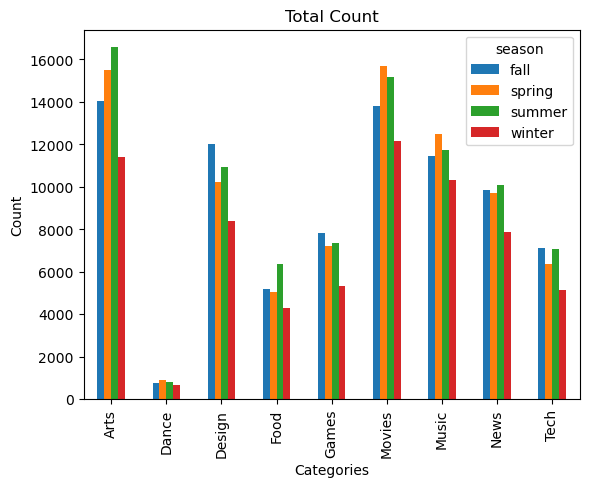

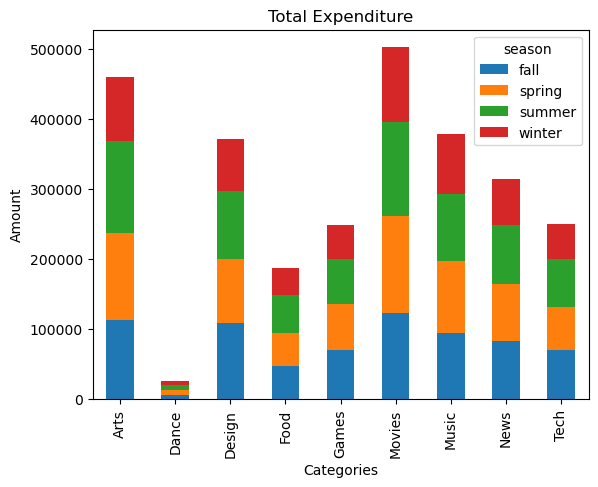

In [28]:
#Display data groupings 
season_dist.plot(kind='bar',title='Total Count', ylabel='Count',xlabel='Categories')
spend_dist.plot(kind='bar', stacked=True, title='Total Expenditure', ylabel='Amount', xlabel='Categories')

C:\Users\Bmbofwana\AppData\Local\Temp\ipykernel_860\891542046.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned.transform_goal)


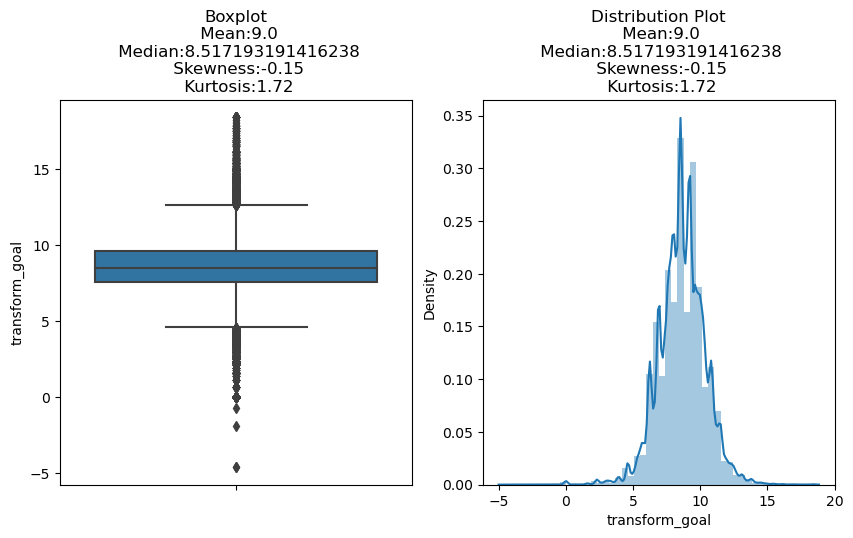

In [29]:
# Looking the distribution of goal
plt.figure(figsize=(10,5))

skewness = round(data_cleaned.transform_goal.skew(),2)
kurtosis = round(data_cleaned.transform_goal.kurtosis(),2)
mean = round(np.mean(data_cleaned.transform_goal),0)
median = np.median(data_cleaned.transform_goal)

plt.subplot(1,2,1)
sns.boxplot(y=data_cleaned.transform_goal)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(data_cleaned.transform_goal)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

In [30]:
data_cleaned['New_category'].unique()
News = data_cleaned[data_cleaned.New_category == 'Movies']['transform_goal']


In [33]:
#Split the data
X = data_cleaned[['name', 'day', 'season', 'year', 'New_Sub',\
       'transform_goal']]
y = data_cleaned[['New_category']]

print(X.shape)
print(y.shape)

(316807, 6)
(316807, 1)


In [36]:
#Create encoding for response variable
categories = {'News': 0, 'Movies': 1, 'Music': 2, 'Food': 3, 'Design': 4, 'Arts': 5, 'Games': 6, 'Tech': 7, 'Dance': 8}

#Map response variable
y['class'] = y['New_category'].map(categories)

#Drop Uncategorized variable 
y = y.drop(columns=['New_category'])



KeyError: 'New_category'

In [37]:
#View data types 
y.sample(5)

,class
283063,6
20009,4
4434,2
190990,6
61041,4


In [39]:
#Recode season 
X['season_cat'] = X['season'].replace({'summer': 1,'winter': 2,'spring': 3,'fall': 4})
X['day_cat'] = X['day'].replace({'weekday': 0, 'weekend': 1 })
X = X.drop(columns=['name'])
X.sample(5)

KeyError: "['name'] not found in axis"

In [40]:
#Encode variables 
df_one_hot = pd.get_dummies(X['New_Sub'], prefix='category')
df_one_hot


,category_Books & Publishing,category_Comics & Graphic Novels,category_Design & Craft,category_Events & Festivals,category_Experimental & Avant-Garde,category_Faith & Spirituality,category_Fashion & Apparel,category_Film & Video,category_Food & Drink,category_Games & Gaming,...,category_Music,category_Narrative & Drama,category_Nature & Exploration,category_Performance Art,category_Performing Arts,category_Public & Community Art,category_Spaces & Architecture,category_Technology,category_Visual Arts,category_Visual Storytelling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323120,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
323121,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
323122,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
323123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
#Concatenate dataframes 
X = pd.concat([X, df_one_hot], axis=1)


In [42]:
columns_to_drop = ['day','season','goal','year','New_Sub']

# Check which columns are in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in X.columns]

# Drop only the existing columns
if existing_columns_to_drop:
    X = X.drop(columns=existing_columns_to_drop)
X

,transform_goal,season_cat,day_cat,category_Books & Publishing,category_Comics & Graphic Novels,category_Design & Craft,category_Events & Festivals,category_Experimental & Avant-Garde,category_Faith & Spirituality,category_Fashion & Apparel,...,category_Music,category_Narrative & Drama,category_Nature & Exploration,category_Performance Art,category_Performing Arts,category_Public & Community Art,category_Spaces & Architecture,category_Technology,category_Visual Arts,category_Visual Storytelling
0,6.907755,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.714418,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.517193,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,9.878170,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.819778,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323120,10.819778,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323121,7.313220,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323122,9.615805,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323123,9.615805,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
#Convert all columns to appropriate data types
X = X.astype('int')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316807 entries, 0 to 323124
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   transform_goal                       316807 non-null  int32
 1   season_cat                           316807 non-null  int32
 2   day_cat                              316807 non-null  int32
 3   category_Books & Publishing          316807 non-null  int32
 4   category_Comics & Graphic Novels     316807 non-null  int32
 5   category_Design & Craft              316807 non-null  int32
 6   category_Events & Festivals          316807 non-null  int32
 7   category_Experimental & Avant-Garde  316807 non-null  int32
 8   category_Faith & Spirituality        316807 non-null  int32
 9   category_Fashion & Apparel           316807 non-null  int32
 10  category_Film & Video                316807 non-null  int32
 11  category_Food & Drink                31

In [44]:
#Make appropriate train test data group 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [53]:
#!pip install xgboost
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


#Initialize model object 
my_model = RandomForestClassifier(criterion='entropy',max_depth=5)

In [54]:
#fit model
my_model.fit(X_train,y_train)

c:\Users\Bmbofwana\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=5)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = my_model.predict(X_test)

# Assess Model 
score = accuracy_score(y_test,y_pred)
print('Accuracy: ',round(score*100,2),'%')

# Calculate evaluation metrics
#mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test, y_pred)
#r2 = my_model.score(y_test, y_pred)

# Print the evaluation metrics
#print("Mean Squared Error (MSE):", mse)
#print("Mean Absolute Error (MAE):", mae)
#print("R-squared (R²):", r2)


Accuracy:  88.8 %


In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
print(confusion_matrix(y_test.values, y_pred))


[[10050   910     0     0     0     0     0   295     0]
 [    0 16480   179     0     0   298     0     0     0]
 [    0     0 13553     0     0   266     0     0     0]
 [    0     0     0  5599     0   629     0     0     0]
 [    0     0     0     0 11701   778     0     0     0]
 [  442     0     0     0  2730 14037     0     0     0]
 [    0     0     0     0     0   521  7842     0     0]
 [    0     0   127     0   609   109     0  6919     0]
 [    0     0     0     0     0   969     0     0     0]]


In [57]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(my_model, file)
print("Model has been saved as 'model.pkl'")

Model has been saved as 'model.pkl'


In [58]:
# Load the pickled model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
